In [2]:
import os
import sys
os.chdir(sys.path[0])
os.getcwd() 

'd:\\Semester 4\\03 Machine Learning\\04 Project'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [7]:
df = df.drop("Person ID", axis=1)

In [8]:
df['Systolic Pressure'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic Pressure'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1])) 
df.drop(['Blood Pressure'], axis=1, inplace=True)

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
le = LabelEncoder()
ss = StandardScaler()

In [11]:
def preprocessor(og_data):
    preprocessed_data = []
    

In [12]:
le = LabelEncoder()
ss = StandardScaler()

In [13]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])

In [14]:
df['Age'] = ss.fit_transform(df[['Age']])
df['Sleep Duration'] = ss.fit_transform(df[['Sleep Duration']])
df['Physical Activity Level'] = ss.fit_transform(df[['Physical Activity Level']])
df['Stress Level'] = ss.fit_transform(df[['Stress Level']])
df['Heart Rate'] = ss.fit_transform(df[['Heart Rate']])
df['Daily Steps'] = ss.fit_transform(df[['Daily Steps']])
df['Systolic Pressure'] = ss.fit_transform(df[['Systolic Pressure']])
df['Diastolic Pressure'] = ss.fit_transform(df[['Diastolic Pressure']])
df['Quality of Sleep'] = ss.fit_transform(df[['Quality of Sleep']])

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,-1.753096,9,-1.298887,-1.098280,-0.825418,0.347021,3,1.654719,-1.619584,1,-0.330002,-0.268102
1,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,1,-0.459239,-0.755640
2,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,1,-0.459239,-0.755640
3,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,2,1.479309,0.869486
4,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,2,1.479309,0.869486


In [15]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [16]:
y.value_counts()

1    219
2     78
0     77
Name: Sleep Disorder, dtype: int64

In [17]:
px.pie(df, names='Sleep Disorder', title='Sleep Disorder Distribution', hole=0.5, labels=['None', 'Sleep Apnea', 'Insomnia'])

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
rus = RandomUnderSampler(random_state=42)

In [20]:
x_res, y_res = rus.fit_resample(X, y)

In [21]:
px.pie(pd.DataFrame(y_res, columns=['Sleep Disorder']), names='Sleep Disorder', title='Sleep Disorder Distribution after Under Sampling', hole=0.5, labels=['None', 'Sleep Apnea', 'Insomnia'])

In [22]:
len(y_res) / 3

77.0

In [23]:
df1 = pd.concat([x_res, y_res], axis=1)
df1.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Sleep Disorder
0,1,-1.637643,9,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,1.479309,0.869486,0
1,1,-1.522190,10,-1.047186,-1.098280,-0.921559,0.911306,2,2.865331,-2.052819,1.479309,0.869486,0
2,0,-1.522190,5,-0.795484,-1.934852,-0.921559,0.911306,1,2.381086,-1.743365,0.445417,0.381948,0
3,0,-1.406737,5,-0.921335,-1.934852,-1.161909,0.911306,1,1.896841,-1.681475,0.186944,0.219435,0
4,1,-1.060377,1,-1.424738,-1.098280,-1.402260,1.475592,0,0.444107,-1.124458,-0.459239,-0.755640,0


In [24]:
df1['Sleep Disorder'].value_counts()

0    77
1    77
2    77
Name: Sleep Disorder, dtype: int64

In [25]:
df.to_csv('Balanced_Dataset.csv', index=False)

# With undersampling

# Bayesian Classifier

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb = GaussianNB()

In [30]:
gnb.fit(xtrain, ytrain)

GaussianNB()

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
print(classification_report(ytrain, gnb.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        66
           1       0.85      0.89      0.87        57
           2       0.94      0.84      0.89        61

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



In [33]:
print(classification_report(ytest, gnb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.90      0.90      0.90        20
           2       0.91      0.62      0.74        16

    accuracy                           0.81        47
   macro avg       0.81      0.81      0.79        47
weighted avg       0.84      0.81      0.81        47



# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

## GINI

In [35]:
dtcg = DecisionTreeClassifier(random_state=42)

In [36]:
dtcg.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [37]:
print(classification_report(ytrain, dtcg.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        66
           1       0.94      0.89      0.92        57
           2       0.95      0.90      0.92        61

    accuracy                           0.92       184
   macro avg       0.93      0.92      0.92       184
weighted avg       0.93      0.92      0.92       184



In [38]:
print(classification_report(ytest, dtcg.predict(xtest)))

              precision    recall  f1-score   support

           0       0.53      0.91      0.67        11
           1       0.87      0.65      0.74        20
           2       0.92      0.75      0.83        16

    accuracy                           0.74        47
   macro avg       0.77      0.77      0.75        47
weighted avg       0.81      0.74      0.75        47



## Entropy 

In [39]:
dtce = DecisionTreeClassifier(random_state=42, criterion='entropy')
dtce.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
print(classification_report(ytrain, dtce.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        66
           1       0.94      0.89      0.92        57
           2       0.95      0.90      0.92        61

    accuracy                           0.92       184
   macro avg       0.93      0.92      0.92       184
weighted avg       0.93      0.92      0.92       184



In [41]:
print(classification_report(ytest, dtce.predict(xtest)))

              precision    recall  f1-score   support

           0       0.56      0.91      0.69        11
           1       0.88      0.70      0.78        20
           2       0.92      0.75      0.83        16

    accuracy                           0.77        47
   macro avg       0.78      0.79      0.77        47
weighted avg       0.82      0.77      0.77        47



## Log Loss

In [42]:
dtcl = DecisionTreeClassifier(random_state=42, criterion='log_loss')
dtcl.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

In [43]:
print(classification_report(ytrain, dtcl.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        66
           1       0.94      0.89      0.92        57
           2       0.95      0.90      0.92        61

    accuracy                           0.92       184
   macro avg       0.93      0.92      0.92       184
weighted avg       0.93      0.92      0.92       184



In [44]:
print(classification_report(ytest, dtcl.predict(xtest)))

              precision    recall  f1-score   support

           0       0.56      0.91      0.69        11
           1       0.88      0.70      0.78        20
           2       0.92      0.75      0.83        16

    accuracy                           0.77        47
   macro avg       0.78      0.79      0.77        47
weighted avg       0.82      0.77      0.77        47



# With Oversampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler(random_state=42)

x_res, y_res = ros.fit_resample(X, y)

In [47]:
y_res.value_counts()

1    219
2    219
0    219
Name: Sleep Disorder, dtype: int64

In [48]:
oversampled_df = pd.concat([x_res, y_res], axis=1)
oversampled_df.to_csv('Oversampled_Dataset.csv', index=False)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

## Bayes

In [50]:
GNB = GaussianNB()

GNB.fit(X_train, y_train)

GaussianNB()

In [51]:
print(classification_report(y_train, GNB.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       190
           1       0.86      0.91      0.88       167
           2       0.93      0.86      0.90       168

    accuracy                           0.88       525
   macro avg       0.89      0.88      0.88       525
weighted avg       0.89      0.88      0.88       525



In [52]:
print(classification_report(y_test, GNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.87      0.92      0.90        52
           2       1.00      0.82      0.90        51

    accuracy                           0.88       132
   macro avg       0.87      0.88      0.87       132
weighted avg       0.89      0.88      0.88       132



In [53]:
import pickle

  

## Decision Tree

### GINI

In [54]:
dtcG = DecisionTreeClassifier(random_state=42)

dtcG.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
print(classification_report(y_train, dtcG.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       190
           1       0.95      0.88      0.91       167
           2       0.93      0.94      0.94       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [56]:
print(classification_report(y_test, dtcG.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.93      0.81      0.87        52
           2       0.96      0.90      0.93        51

    accuracy                           0.87       132
   macro avg       0.86      0.88      0.86       132
weighted avg       0.89      0.87      0.87       132



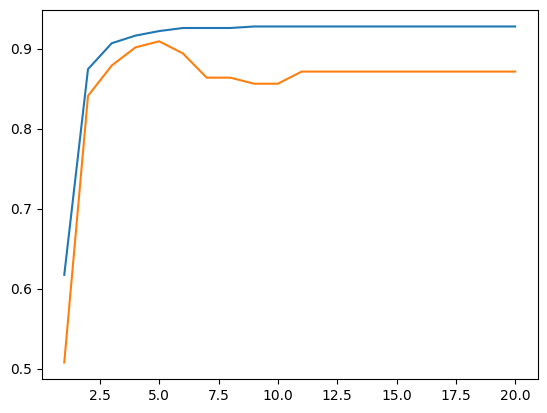

In [57]:
acc_train = []
acc_test = []

for i in range(1, 21):
    dtc = DecisionTreeClassifier(random_state=42, max_depth=i, criterion='gini')
    dtc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, dtc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, dtc.predict(X_test)))

plt.plot(range(1, 21), acc_train, label='Train Accuracy')
plt.plot(range(1, 21), acc_test, label='Test Accuracy')

In [58]:
# Get the best depth
best_depth = acc_test.index(max(acc_test)) + 1
best_depth

5

In [59]:
acc_train.index(max(acc_train)) + 1

9

### Entropy

In [60]:
dtcE = DecisionTreeClassifier(random_state=42, criterion='entropy')
dtcE.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
print(classification_report(y_train, dtcE.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       190
           1       0.95      0.88      0.91       167
           2       0.93      0.94      0.94       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [62]:
print(classification_report(y_test, dtcE.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.93      0.81      0.87        52
           2       0.96      0.90      0.93        51

    accuracy                           0.87       132
   macro avg       0.86      0.88      0.86       132
weighted avg       0.89      0.87      0.87       132



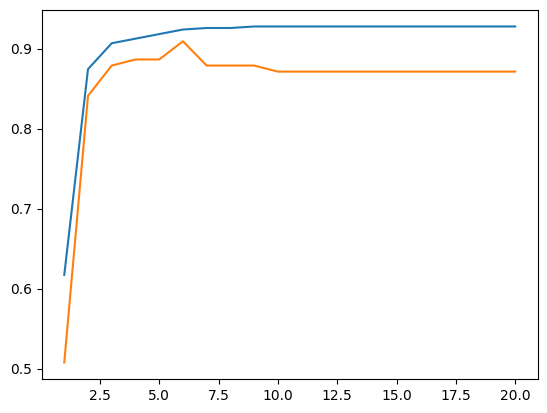

In [63]:
acc_train = []
acc_test = []

for i in range(1, 21):
    dtc = DecisionTreeClassifier(random_state=42, max_depth=i, criterion='entropy')
    dtc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, dtc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, dtc.predict(X_test)))

plt.plot(range(1, 21), acc_train, label='Train Accuracy')
plt.plot(range(1, 21), acc_test, label='Test Accuracy')

In [64]:
# Get the best depth
best_depth = acc_test.index(max(acc_test)) + 1
best_depth

6

In [65]:
acc_train.index(max(acc_train)) + 1

9

### Log Loss

In [66]:
dtcL = DecisionTreeClassifier(random_state=42, criterion='log_loss')
dtcL.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

In [67]:
print(classification_report(y_train, dtcL.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       190
           1       0.95      0.88      0.91       167
           2       0.93      0.94      0.94       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [68]:
print(classification_report(y_test, dtcL.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.93      0.81      0.87        52
           2       0.96      0.90      0.93        51

    accuracy                           0.87       132
   macro avg       0.86      0.88      0.86       132
weighted avg       0.89      0.87      0.87       132



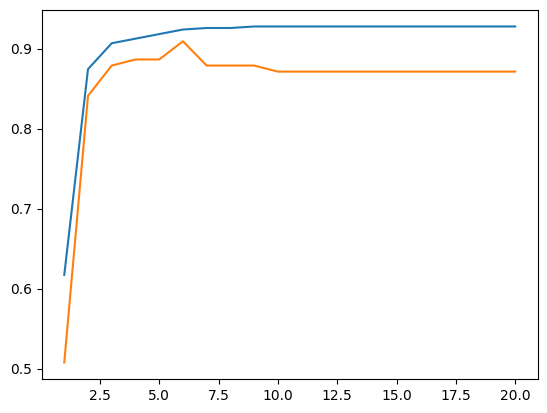

In [69]:
acc_train = []
acc_test = []

for i in range(1, 21):
    dtc = DecisionTreeClassifier(random_state=42, max_depth=i, criterion='log_loss')
    dtc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, dtc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, dtc.predict(X_test)))

plt.plot(range(1, 21), acc_train, label='Train Accuracy')
plt.plot(range(1, 21), acc_test, label='Test Accuracy')

In [70]:
# Get the best depth
best_depth = acc_test.index(max(acc_test)) + 1
best_depth

6

In [71]:
acc_train.index(max(acc_train)) + 1

9

# AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
abc = AdaBoostClassifier(base_estimator=dtcG, random_state=42)

In [74]:
abc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [75]:
print(classification_report(y_train, abc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       190
           1       0.93      0.90      0.92       167
           2       0.93      0.94      0.94       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [76]:
print(classification_report(y_test, abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.90      0.87      0.88        52
           2       0.94      0.90      0.92        51

    accuracy                           0.87       132
   macro avg       0.86      0.86      0.86       132
weighted avg       0.88      0.87      0.87       132



### Optimise Learning Rate and Number of estimators 

In [77]:
acc_train = []
acc_test = []

for i in range(25, 300):
    for j in range(1, 10001):
        lr = j / 100000
        abc = AdaBoostClassifier(base_estimator=dtcG, random_state=42, n_estimators=i, learning_rate=lr)
        abc.fit(X_train, y_train)
        acc_train.append(accuracy_score(y_train, abc.predict(X_train)))
        acc_test.append(accuracy_score(y_test, abc.predict(X_test)))

KeyboardInterrupt: 

In [ ]:
acc_train = []
acc_test = []

for j in range(1, 101):
    lr = j / 100
    abc = AdaBoostClassifier(base_estimator=dtcG, random_state=42, n_estimators=50, learning_rate=lr)
    abc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, abc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, abc.predict(X_test)))

In [ ]:
plt.plot(np.linspace(0.00, 1, 0.001), acc_train, label='Train Accuracy')
plt.plot(np.linspace(0.00, 1, 0.001), acc_test, label='Test Accuracy')

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
# Get the best learning rate
best_lr = acc_test.index(max(acc_test)) + 1
best_lr

1

# Preprocessor Function

In [78]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [79]:
data.drop('Person ID', axis=1, inplace=True)

In [80]:
data['Systolic Pressure'] = data['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
data['Diastolic Pressure'] = data['Blood Pressure'].apply(lambda x: int(x.split('/')[1])) 
data.drop(['Blood Pressure'], axis=1, inplace=True)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [81]:
data['BMI Category'].unique()
data['BMI Category'] = data['BMI Category'].replace('Normal', 'Normal Weight')
data['BMI Category'].unique()

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

In [82]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [83]:
le_gender = LabelEncoder()
le_gender.fit_transform(data['Gender'])
le_gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
print(le_gender_mapping)

{'Female': 0, 'Male': 1}


In [84]:
ss_age = StandardScaler()
ss_age.fit_transform(data[['Age']])
ss_age.mean_, ss_age.scale_

(array([42.18449198]), array([8.66153061]))

In [85]:
le_occupation = LabelEncoder()
le_occupation.fit_transform(data['Occupation'])
le_occupation_mapping = dict(zip(le_occupation.classes_, le_occupation.transform(le_occupation.classes_)))
print(le_occupation_mapping)

{'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}


In [86]:
ss_sleep_duration = StandardScaler()
ss_sleep_duration.fit_transform(data[['Sleep Duration']])
ss_sleep_duration.mean_, ss_sleep_duration.scale_

(array([7.13208556]), array([0.79459231]))

In [87]:
ss_quality_of_sleep = StandardScaler()
ss_quality_of_sleep.fit_transform(data[['Quality of Sleep']])
ss_quality_of_sleep.mean_, ss_quality_of_sleep.scale_

(array([7.31283422]), array([1.19535464]))

In [88]:
ss_physical_activity_level = StandardScaler()
ss_physical_activity_level.fit_transform(data[['Physical Activity Level']])
ss_physical_activity_level.mean_, ss_physical_activity_level.scale_

(array([59.17112299]), array([20.80293635]))

In [89]:
ss_stress_level = StandardScaler()
ss_stress_level.fit_transform(data[['Stress Level']])
ss_stress_level.mean_, ss_stress_level.scale_

(array([5.38502674]), array([1.77215249]))

In [90]:
le_bmi_category = LabelEncoder()
le_bmi_category.fit_transform(data['BMI Category'])
le_bmi_category_mapping = dict(zip(le_bmi_category.classes_, le_bmi_category.transform(le_bmi_category.classes_)))
print(le_bmi_category_mapping)

{'Normal Weight': 0, 'Obese': 1, 'Overweight': 2}


In [91]:
ss_heart_rate = StandardScaler()
ss_heart_rate.fit_transform(data[['Heart Rate']])
ss_heart_rate.mean_, ss_heart_rate.scale_

(array([70.1657754]), array([4.13014286]))

In [92]:
ss_daily_steps = StandardScaler()
ss_daily_steps.fit_transform(data[['Daily Steps']])
ss_daily_steps.mean_, ss_daily_steps.scale_

(array([6816.84491979]), array([1615.75124247]))

In [93]:
ss_systolic_pressure = StandardScaler()
ss_systolic_pressure.fit_transform(data[['Systolic Pressure']])
ss_systolic_pressure.mean_, ss_systolic_pressure.scale_

(array([128.55347594]), array([7.73775218]))

In [94]:
ss_diastolic_pressure = StandardScaler()
ss_diastolic_pressure.fit_transform(data[['Diastolic Pressure']])
ss_diastolic_pressure.mean_, ss_diastolic_pressure.scale_

(array([84.64973262]), array([6.15336849]))

In [95]:
mydata = {
  "gender": "Male",
  "age": "19",
  "occupation": "Software Engineer",
  "sleep_duration": 6,
  "sleep_quality": 7,
  "activity_level": 2,
  "stress_level": 5,
  "bmi_category": "Normal Weight",
  "heart_rate": 60,
  "steps_per_day": 5000,
  "systolic_bp": 120,
  "diastolic_bp": 80,
  "tnc": True,
  "name": "Amay"
}

def preprocessor(og_data, le_gender_mapping, le_occupation_mapping, le_bmi_category_mapping, ss_age, ss_sleep_duration, ss_quality_of_sleep, ss_physical_activity_level, ss_stress_level, ss_heart_rate, ss_daily_steps, ss_systolic_pressure, ss_diastolic_pressure):
    preprocessed_data = dict()

    preprocessed_data['gender'] = le_gender_mapping[og_data['gender']]
    preprocessed_data['age'] = ss_age.transform([[og_data['age']]])[0][0]
    preprocessed_data['occupation'] = le_occupation_mapping[og_data['occupation']]
    preprocessed_data['sleep_duration'] = ss_sleep_duration.transform([[og_data['sleep_duration']]])[0][0]
    preprocessed_data['sleep_quality'] = ss_quality_of_sleep.transform([[og_data['sleep_quality']]])[0][0]
    preprocessed_data['activity_level'] = ss_physical_activity_level.transform([[og_data['activity_level']]])[0][0]
    preprocessed_data['stress_level'] = ss_stress_level.transform([[og_data['stress_level']]])[0][0]
    preprocessed_data['bmi_category'] = le_bmi_category_mapping[og_data['bmi_category']]
    preprocessed_data['heart_rate'] = ss_heart_rate.transform([[og_data['heart_rate']]])[0][0]
    preprocessed_data['steps_per_day'] = ss_daily_steps.transform([[og_data['steps_per_day']]])[0][0]
    preprocessed_data['systolic_bp'] = ss_systolic_pressure.transform([[og_data['systolic_bp']]])[0][0]
    preprocessed_data['diastolic_bp'] = ss_diastolic_pressure.transform([[og_data['diastolic_bp']]])[0][0]

    return preprocessed_data

In [96]:
new = preprocessor(mydata, le_gender_mapping, le_occupation_mapping, le_bmi_category_mapping, ss_age, ss_sleep_duration, ss_quality_of_sleep, ss_physical_activity_level, ss_stress_level, ss_heart_rate, ss_daily_steps, ss_systolic_pressure, ss_diastolic_pressure)
new


{'gender': 1,
 'age': -2.6767199739461884,
 'occupation': 9,
 'sleep_duration': -1.4247376320681155,
 'sleep_quality': -0.26170829482711705,
 'activity_level': -2.7482237138792702,
 'stress_level': -0.217265014786307,
 'bmi_category': 0,
 'heart_rate': -2.461361690063422,
 'steps_per_day': -1.1244583151332361,
 'systolic_bp': -1.1054212823934344,
 'diastolic_bp': -0.7556402038277333}

In [97]:
data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Occupation'] = le_occupation.fit_transform(data['Occupation'])
data['BMI Category'] = le_bmi_category.fit_transform(data['BMI Category'])

data['Age'] = ss_age.fit_transform(data[['Age']])
data['Sleep Duration'] = ss_sleep_duration.fit_transform(data[['Sleep Duration']])
data['Quality of Sleep'] = ss_quality_of_sleep.fit_transform(data[['Quality of Sleep']])
data['Physical Activity Level'] = ss_physical_activity_level.fit_transform(data[['Physical Activity Level']])
data['Stress Level'] = ss_stress_level.fit_transform(data[['Stress Level']])
data['Heart Rate'] = ss_heart_rate.fit_transform(data[['Heart Rate']])
data['Daily Steps'] = ss_daily_steps.fit_transform(data[['Daily Steps']])
data['Systolic Pressure'] = ss_systolic_pressure.fit_transform(data[['Systolic Pressure']])
data['Diastolic Pressure'] = ss_diastolic_pressure.fit_transform(data[['Diastolic Pressure']])
data.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,-1.753096,9,-1.298887,-1.098280,-0.825418,0.347021,2,1.654719,-1.619584,None,-0.330002,-0.268102
1,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,None,-0.459239,-0.755640
2,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,None,-0.459239,-0.755640
3,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,1,3.591698,-2.362273,Sleep Apnea,1.479309,0.869486
4,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,1,3.591698,-2.362273,Sleep Apnea,1.479309,0.869486


In [98]:
le_sleep_disorder = LabelEncoder()
data['Sleep Disorder'] = le_sleep_disorder.fit_transform(data['Sleep Disorder'])
le_sleep_disorder_mapping = dict(zip(le_sleep_disorder.classes_, le_sleep_disorder.transform(le_sleep_disorder.classes_)))
print(le_sleep_disorder_mapping)

{'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}


In [99]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_res, y_res = ros.fit_resample(X, y)

final = pd.concat([x_res, y_res], axis=1)

final.to_csv('Final_oversampled.csv', index=False)